#Julian Esteban Cordero Ramos - 202016908_48

In [ ]:
# 1 Realizar Analisis exploratorio de los datos (Regresión Logistica)

In [38]:
# Cargar las librerias necesarias

import pandas as pd #Manejo y analisis de estructuras de datos
import numpy as np #Calculo numerico y analisis de datos
import seaborn as sns #Creacion de graficos estadísticos
import matplotlib.pyplot as plt #Creacino de graficos en dos dimensiones

# Librerías para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para reg lineal
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
#Lectura de datos en Python y lo cargamos en la variable Salud

Salud = pd.read_csv('C:/Users/julia/Documents/UNAD/ARCHIVOS/HEART.CSV')

In [4]:
#Realizamos la lectura de los datos para el analisis exploratorio

Salud.head(50)

,edad,sexo,cp,Presion,Colesterol,Azucar,Electros,FrecCardiaca,exang(Ernia),oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [25]:
#descripción de los datos
Salud.describe()

,edad,sexo,cp,Presion,Colesterol,Azucar,Electros,FrecCardiaca,exang(Ernia),oldpeak,slope,ca,thal,condition
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,54.384342,0.686833,2.315444,131.270463,238.915032,0.145907,1.000000,149.590747,0.316726,1.040925,0.612100,0.538014,0.846975,0.455516
std,9.096406,0.464609,0.735855,17.462147,40.178500,0.353643,0.996422,23.081218,0.466030,1.157151,0.617364,0.711905,0.956967,0.498906
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,210.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.158249,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,268.000000,0.000000,2.000000,165.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,319.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,2.000000,1.000000


Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

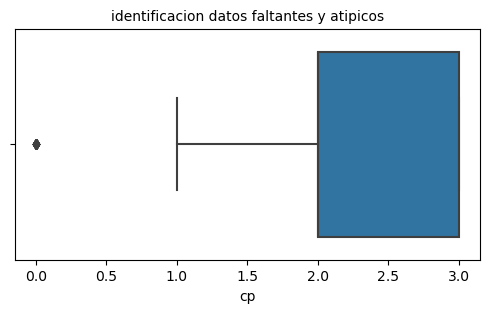

In [6]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Salud['cp']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos',fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos Colesterol')

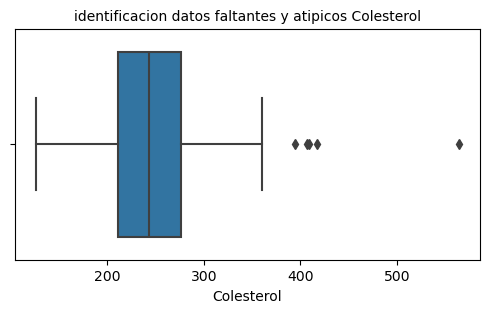

In [7]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Salud['Colesterol']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos Colesterol',fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos frecCardiaca')

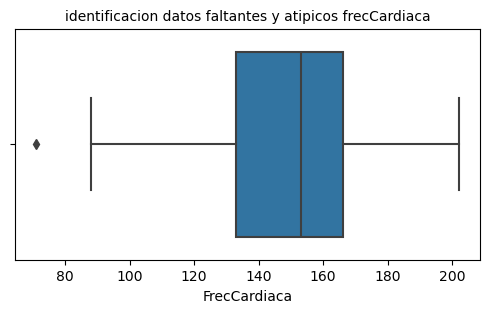

In [8]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Salud['FrecCardiaca']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos frecCardiaca',fontsize=10)

Text(0.5, 1.0, 'identificacion datos fltantes y atipicos oledpeak')

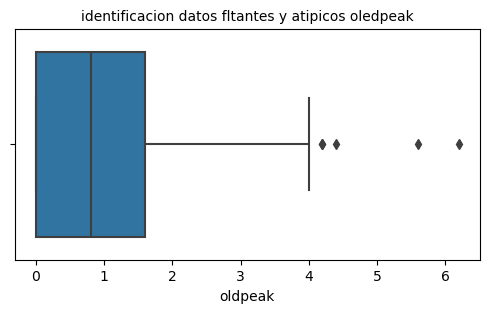

In [9]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Salud['oldpeak']) #Diagrama de cajas
plt.title('identificacion datos fltantes y atipicos oledpeak',fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos azucar')

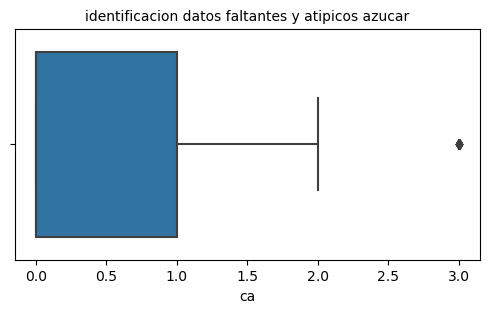

In [10]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Salud['ca']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos azucar',fontsize=10)

In [11]:
#2 PROCESAR LOS DATOS LIMPIANDOLOS, TRATANDO VALORES FALTANTES Y TRANSFORMANDO SEGUN SEA NECESARIO

In [12]:
#Revision Datos faltantes

print("cantidad de registros con cero en cp :",Salud['cp'].isin([0]).sum())
print("cantidad de registros con cero en ca :",Salud['ca'].isin([3]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([564]).sum())



cantidad de registros con cero en cp : 23
cantidad de registros con cero en ca : 20
cantidad de registros por encima de limites en Colesterol : 1


In [13]:
#Reemplazar los valores atipicos anteriores por el valor promedio de la columna

Salud['cp']=Salud['cp'].replace(0,Salud['cp'].mean())
Salud['ca']=Salud['ca'].replace(3,Salud['ca'].mean())
Salud['Colesterol']=Salud['Colesterol'].replace(564,Salud['Colesterol'].mean())


In [14]:
#Nueva validación de atipicos.

print("cantidad de registros con cero en cp :",Salud['cp'].isin([0]).sum())
print("cantidad de registros con cero en ca :",Salud['ca'].isin([3]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([564]).sum())

cantidad de registros con cero en cp : 0
cantidad de registros con cero en ca : 0
cantidad de registros por encima de limites en Colesterol : 0


Text(0.5, 1.0, 'identificacion datos faltantes y atipicos Colesterol')

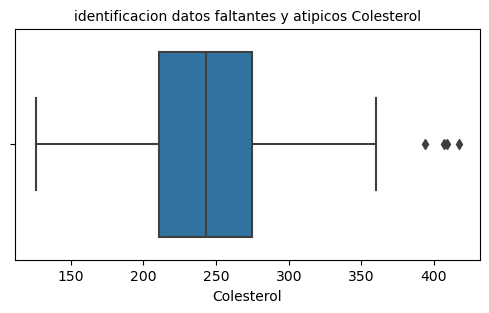

In [15]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Salud['Colesterol']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos Colesterol',fontsize=10)


In [16]:
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([417]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([407]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([409]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([394]).sum())

cantidad de registros por encima de limites en Colesterol : 1
cantidad de registros por encima de limites en Colesterol : 1
cantidad de registros por encima de limites en Colesterol : 1
cantidad de registros por encima de limites en Colesterol : 1


In [17]:
Salud['Colesterol']=Salud['Colesterol'].replace(417,Salud['Colesterol'].mean())
Salud['Colesterol']=Salud['Colesterol'].replace(407,Salud['Colesterol'].mean())
Salud['Colesterol']=Salud['Colesterol'].replace(409,Salud['Colesterol'].mean())
Salud['Colesterol']=Salud['Colesterol'].replace(394,Salud['Colesterol'].mean())

In [18]:
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([417]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([407]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([409]).sum())
print("cantidad de registros por encima de limites en Colesterol :",Salud['Colesterol'].isin([394]).sum())

cantidad de registros por encima de limites en Colesterol : 0
cantidad de registros por encima de limites en Colesterol : 0
cantidad de registros por encima de limites en Colesterol : 0
cantidad de registros por encima de limites en Colesterol : 0


Text(0.5, 1.0, 'identificacion datos faltantes y atipicos Colesterol')

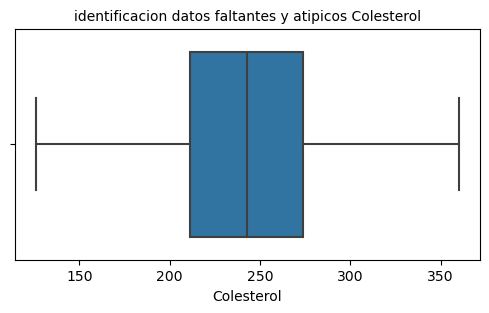

In [19]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Salud['Colesterol']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos Colesterol',fontsize=10)


In [20]:
#Conteo de datos atipicos mayores a:

nivel_minimo=70
nivel_maximo=320

Total_atipicos=((Salud['Colesterol']<nivel_minimo)|(Salud['Colesterol']>nivel_maximo)).sum()
print("El total de datos atipicos de colesterol es: {}".format(Total_atipicos))



El total de datos atipicos de colesterol es: 16


In [21]:
#Para filtrar los minimos y maximos anteriores
Salud=Salud[(Salud['Colesterol']<nivel_maximo)&(Salud['Colesterol']>nivel_minimo)]

In [22]:
#Volver a validar que lo anterior quedó bien y en ceros

Total_atipicos=((Salud['Colesterol']<nivel_minimo)|(Salud['Colesterol']>nivel_maximo)).sum()
print("El total de datos atipicos de colesterol es: {}".format(Total_atipicos))

El total de datos atipicos de colesterol es: 0


In [23]:
#Revision del tipo de info y datos faltantes

Salud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 0 to 296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          281 non-null    int64  
 1   sexo          281 non-null    int64  
 2   cp            281 non-null    float64
 3   Presion       281 non-null    int64  
 4   Colesterol    281 non-null    float64
 5   Azucar        281 non-null    int64  
 6   Electros      281 non-null    int64  
 7   FrecCardiaca  281 non-null    int64  
 8   exang(Ernia)  281 non-null    int64  
 9   oldpeak       281 non-null    float64
 10  slope         281 non-null    int64  
 11  ca            281 non-null    float64
 12  thal          281 non-null    int64  
 13  condition     281 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 32.9 KB


In [26]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Salud['condition'].value_counts()

condition
0    153
1    128
Name: count, dtype: int64

In [27]:

Salud[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [34]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

# Porcentajes de datos para entrenamiento (Train = 75 % ) ; y para prueba ( Test = 25% )

X = Salud.drop('condition',axis=1) #Se cargan los datos de train sin los datos de la columna Condition
Y = Salud['condition']  #Se cargan los datos de train con los datos de la columna Condition

#la funcion train_test_split crea una división de un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba (train and test)
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y, test_size=0.25 , stratify=Y, random_state=0)


In [35]:
print (X_train)

     edad  sexo        cp  Presion  Colesterol  Azucar  Electros  \
270    47     1  3.000000      110       275.0       0         2   
28     62     1  1.000000      120       281.0       0         2   
260    51     1  3.000000      140       298.0       0         0   
149    41     0  2.000000      112       268.0       0         2   
103    57     1  2.000000      128       229.0       0         2   
..    ...   ...       ...      ...         ...     ...       ...   
81     67     0  2.000000      152       277.0       0         0   
16     52     1  2.158249      152       298.0       1         0   
97     59     1  2.000000      150       212.0       1         0   
11     59     1  2.158249      160       273.0       0         2   
214    58     1  3.000000      128       216.0       0         2   

     FrecCardiaca  exang(Ernia)  oldpeak  slope        ca  thal  
270           118             1      1.0      1  1.000000     0  
28            103             0      1.4      1  1.

In [36]:
print (Y_train)

270    1
28     1
260    1
149    0
103    1
      ..
81     0
16     0
97     0
11     1
214    1
Name: condition, Length: 210, dtype: int64


In [37]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros. 

#Construir el modelo de regresion logistica

modelo_regresion = LogisticRegression (solver = 'liblinear') # liblinear es una libreria para resolver problemas lineales de clasificacion y regresion

modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de predicción
Prediccion= modelo_regresion.predict(X_test) #La funcion predict predice los valores a partir del conjunto de datos para vlaidación


In [40]:
#Construir el modelo de regresion (((LINEAL)))

#modelo_regresion = linearRegression (solver = 'liblinear') # liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
#modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de predicción
#Prediccion= modelo_regresion.predict(X_test) #La funcion predict predice los valores a partir del conjunto de datos para vlaidación

In [41]:
print (Y_test)

224    1
164    1
74     1
107    0
266    0
      ..
248    1
220    1
264    1
296    1
292    1
Name: condition, Length: 71, dtype: int64


In [42]:
print (Prediccion)

[1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0]


In [43]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.81      0.69      0.75        32

    accuracy                           0.79        71
   macro avg       0.79      0.78      0.78        71
weighted avg       0.79      0.79      0.79        71



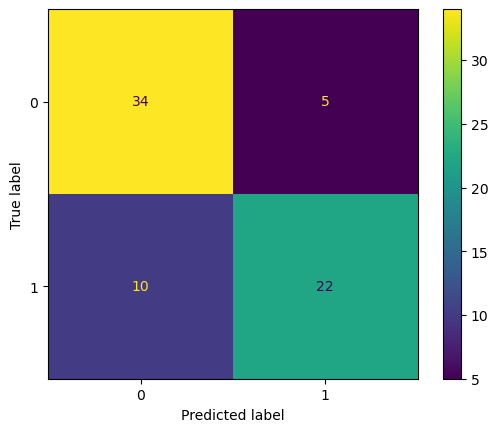

In [45]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 

#Matriz de confusion

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [48]:
#8